# Data Visualization on Euro Exchange Rates
## [Dataset](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-1999202) import and cleanup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())
print(exchange_rates.tail())
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

**We will concentrate on comparing the exchange rate of the US Dollar vs the Euro.**

In [2]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [3]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar = euro_to_dollar[euro_to_dollar['Time'].dt.year>=2000]
print(euro_to_dollar.info())
euro_to_dollar.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5378 entries, 260 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5378 non-null   datetime64[ns]
 1   US_dollar  5378 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 126.0 KB
None


,Time,US_dollar
260,2000-01-03,1.0090
261,2000-01-04,1.0305
262,2000-01-05,1.0368
263,2000-01-06,1.0388
264,2000-01-07,1.0284


# Rolling Mean

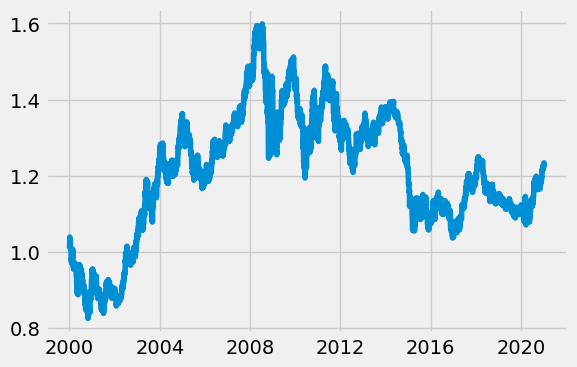

In [4]:
style.use('fivethirtyeight')
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

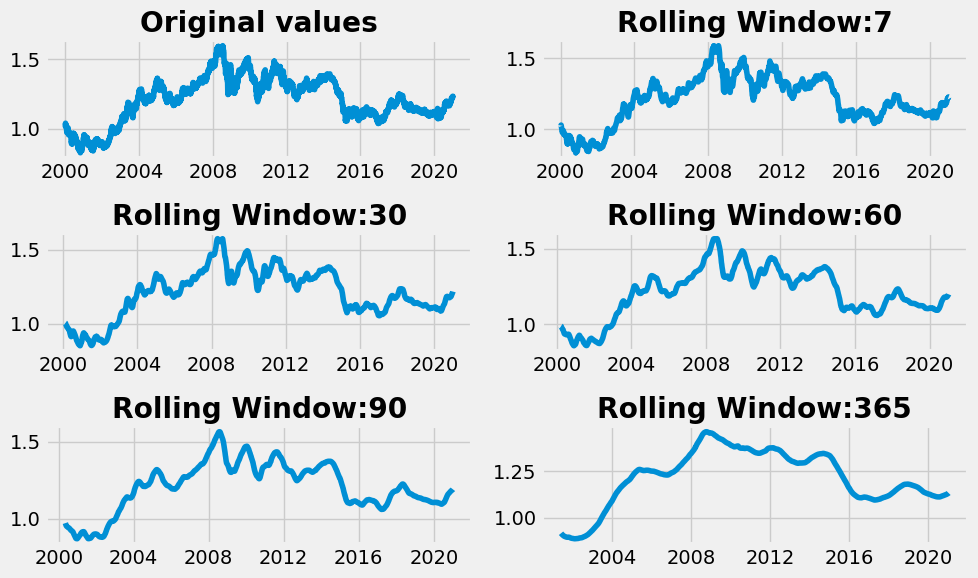

In [5]:
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight = 'bold')

for i, rolling_window in zip([2,3,4,5,6],[7,30,60,90,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(rolling_window).mean())
    plt.title('Rolling Window:'+str(rolling_window), weight='bold')
    plt.tight_layout()

**As the rolling mean period increases the charts become more smooth.**

# US Dollar vs Chinese Yuan 
**Comparing whether there is any correlation between the rise and fall of the values of these two currencies when priced in Euros.**

In [6]:
exchange_rates.rename(columns={'[Chinese yuan renminbi ]': 'Chinese_Yuan',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_to_yuan = exchange_rates[['Time', 'Chinese_Yuan']].copy()
euro_to_yuan = euro_to_yuan[euro_to_yuan['Chinese_Yuan'] != '-']
euro_to_yuan['Chinese_Yuan'] = euro_to_yuan['Chinese_Yuan'].astype(float)

euro_to_yuan.tail()

,Time,Chinese_Yuan
5694,2021-01-04,7.9484
5695,2021-01-05,7.9315
5696,2021-01-06,7.9653
5697,2021-01-07,7.9392
5698,2021-01-08,7.9184


In [7]:
print("Correlation between Dollar and Yuan: ", euro_to_dollar['US_dollar'].corr(euro_to_yuan['Chinese_Yuan']))

Correlation between Dollar and Yuan:  0.6751413199829539


**The overall correlation is about 68% from 2001 to 2020.**

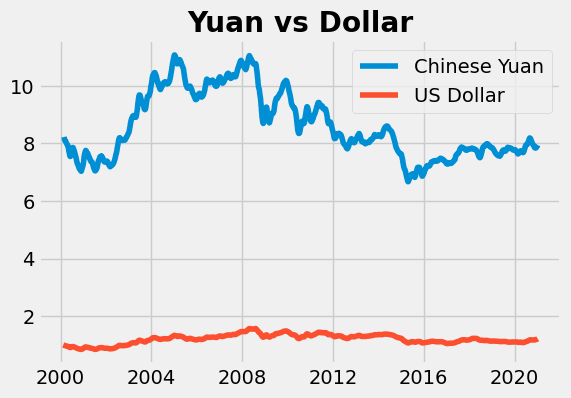

In [8]:
plt.plot(euro_to_yuan['Time'], euro_to_yuan['Chinese_Yuan'].rolling(30).mean(), label='Chinese Yuan')
plt.title("Yuan vs Dollar", weight='bold')
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean(), label='US Dollar')
#plt.text(500,10000,"Correlation factor of 0.675")
plt.legend()
plt.show()

**The exchange rate between the currencies and the Euro is too great to notice any patterns.  We will now split into two seperate graphs and look to see if there are any visible correlations.**  

In [9]:
yuan_2008=euro_to_yuan[euro_to_yuan['Time'].dt.year.between(2001,2007,inclusive=True)]
dollar_2008=euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2001,2007,inclusive=True)]
yuan_2008['Chinese_Yuan'].corr(dollar_2008['US_dollar'])

0.9766571540399508

Text(0.5, 1.0, 'Dollar')

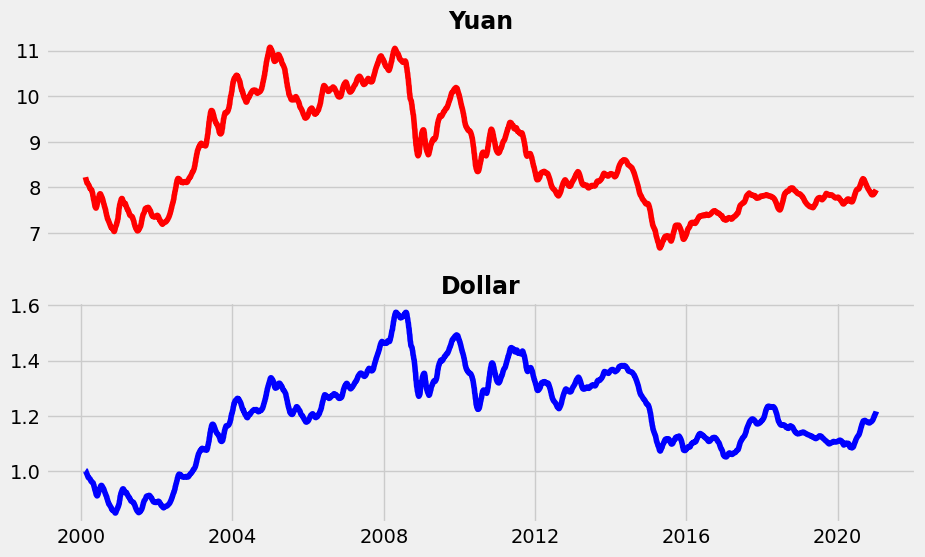

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(euro_to_yuan['Time'], euro_to_yuan['Chinese_Yuan'].rolling(30).mean(), label='Chinese Yuan', color='red')
plt.title("Yuan", weight='bold', size=17)
plt.xticks([],labels=None)
plt.subplot(2,1,2)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(30).mean(), label='US Dollar', color='blue')
plt.title("Dollar", weight='bold',size=17)
#plt.tight_layout()


Text(0.5, 1.0, '2001-2008 Dollar')

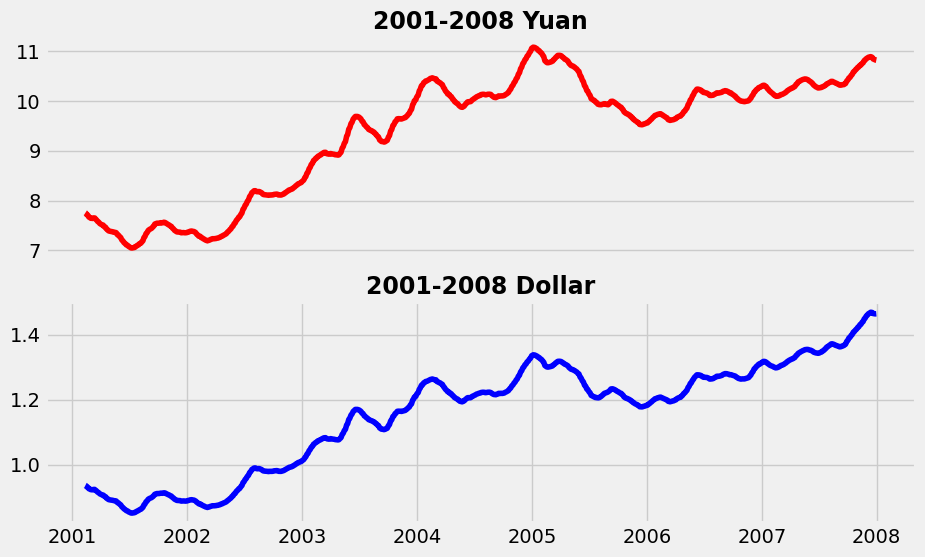

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(yuan_2008['Time'], yuan_2008['Chinese_Yuan'].rolling(30).mean(), label='Chinese Yuan',color='red')
plt.title("2001-2008 Yuan", weight='bold', size=17)
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(dollar_2008['Time'], dollar_2008['US_dollar'].rolling(30).mean(), label='US Dollar', color='blue')
plt.title("2001-2008 Dollar", weight='bold',size=17)
#plt.tight_layout()

**From 2001 to 2008 there is an over 97% correlation in the rise and fall of value when priced in Euro between the two currencies.**

In [12]:
yuan_2008_12=euro_to_yuan[euro_to_yuan['Time'].dt.year.between(2008,2012,inclusive=True)]
dollar_2008_12=euro_to_dollar[euro_to_dollar['Time'].dt.year.between(2008,2012,inclusive=True)]
yuan_2008_12['Chinese_Yuan'].corr(dollar_2008_12['US_dollar'])

0.9348091566749225

Text(0.5, 1.0, '2008-2012 Dollar')

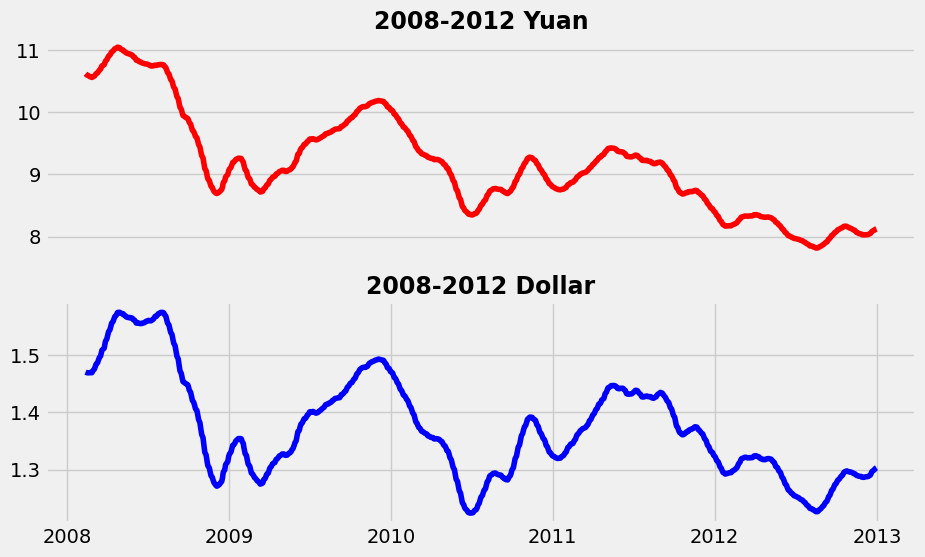

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(yuan_2008_12['Time'], yuan_2008_12['Chinese_Yuan'].rolling(30).mean(), label='Chinese Yuan', color='red')
plt.title("2008-2012 Yuan", weight='bold', size=17)
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(dollar_2008_12['Time'], dollar_2008_12['US_dollar'].rolling(30).mean(), label='US Dollar', color='blue')
plt.title("2008-2012 Dollar", weight='bold',size=17)
#plt.tight_layout()

**The correlation during the years of the financial crisis drops to 93%.**

In [14]:
yuan_2012=euro_to_yuan[euro_to_yuan['Time'].dt.year>2012]
dollar_2012=euro_to_dollar[euro_to_dollar['Time'].dt.year>2012]
yuan_2012['Chinese_Yuan'].corr(dollar_2012['US_dollar'])

0.7834880378708885

Text(0.5, 1.0, '2013-2020 Dollar')

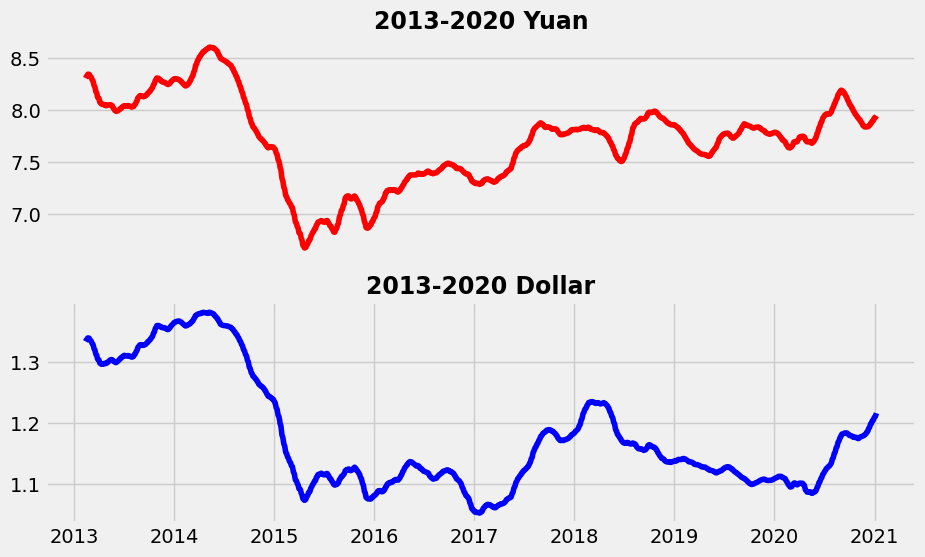

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(yuan_2012['Time'], yuan_2012['Chinese_Yuan'].rolling(30).mean(), label='Chinese Yuan',color='red')
plt.xticks([])
plt.title("2013-2020 Yuan", weight='bold', size=17,)
plt.subplot(2,1,2)
plt.plot(dollar_2012['Time'], dollar_2012['US_dollar'].rolling(30).mean(), label='US Dollar', color='blue')
plt.title("2013-2020 Dollar", weight='bold',size=17)
#plt.tight_layout()

**After 2012 the corrolation between the rise and fall of the two currencies compared to each other vs the Euro drops to 78%.  In conclusion, in the first ten years of the 21st century the rise and fall of the value of the Chinese Yuan closly correlated to the changes in the value US dollar vs the Euro.  In recent years however the trend is that the change in the values of the respective currencies is no longer as closely related.  One possibility is that this is a strong indication that the Chinese economy has become more independent from the US economy.**

# Financial Crisis EXAMPLE

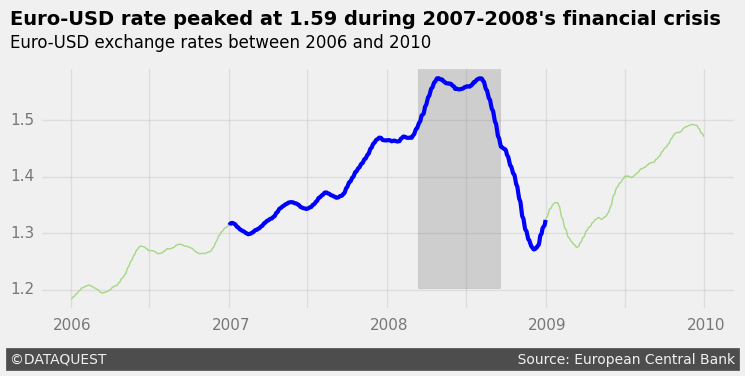

In [16]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='blue')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

# The Three US Presidencies EXAMPLE

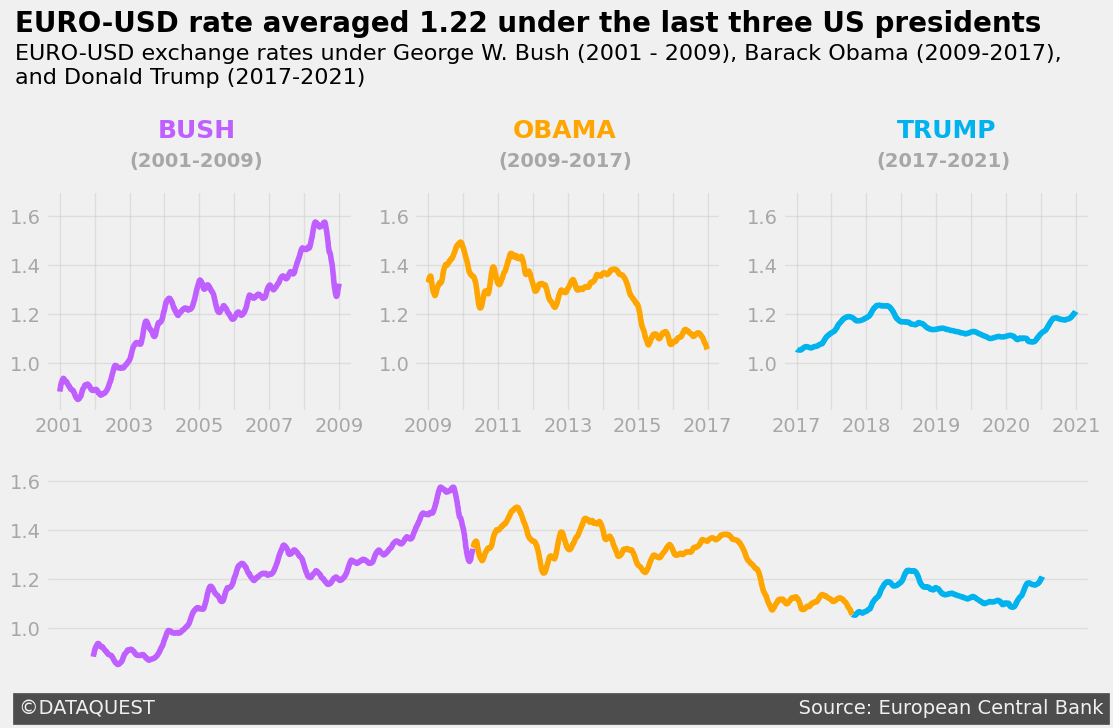

In [17]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()